<p style=' font-size:32px; text-align:center'> <strong>Découverte des librairies </strong>
</p>


<p style='font-size:20px'> <strong>table des matières </strong></p>

* [La librairie numpy](#numpy)
    * [création d'un tableau](#creation)
    * [accéder aux données](#manip)
    * [calcul mathématique](#calcul)
    * [modifier un tableau](#modif)
    * [comparaison et masque](#comparaison)
* [la librairie pandas](#pandas)
    * [création et manipulation de série](#serie)
    * [création d'un dataframe](#creationdf)
    * [accéder aux données](#manipdf)
    * [nettoyage d'un dataframe](#datacleaning)
    * [rassembler plusieurs dataframes](#rassemble)
    * [sauvegarder un dataframe](#sauvegarde)
* [Import export de données](#import_export)
    * [Importation et exportation des fichiers CSV](#CSV)
    * [Importation et exportation des fichiers JSON](#JSON)
    * [Importation et exportation à partir d'une URL](#URL)
    * [Importation et exportation à partir d'une base de données SQL](#SQL)
   

 **Notion de repertoire courant**  

Lorsqu’on lance Jupyter, une arborescence nous est proposée, et nous navigons à l’interieur de celle-ci pour créer ou ouvrir un notebook. Le répertoire contenant le notebook est appellé répertoire courant. Lorsqu’on indiquera à Python d’importer ou d'exporter des données, l’origine (ou la destination) sera indiquée relativement au répertoire courant, à moins d’avoir recours à des chemins absolus (c’est-à-dire un chemin d’accès à partir de la racine /).

In [1]:
import os
cwd = os.getcwd()
print(cwd)

C:\Users\barba\Desktop\formation_python\version_enseignant\support_de_cours


In [2]:
#une méthode utile pour lister tous les fichiers contenus dans un repertoire
os.listdir()

['.ipynb_checkpoints',
 'decouverte_des_librairies.ipynb',
 'fichier',
 'fichier_csv_export.csv',
 'fichier_json_export.json',
 'France.txt',
 'les_bases_du_langage.ipynb']

# La librairie numpy <a class="anchor" id="numpy"></a>

NumPy est une librairie très populaire, qui est très utile pour réaliser de manière efficace des calculs. Elle intègre une nouvelle structure de données: les **ndarray (N-dimensional array)** qui sont des tableaux.   
Les ndarray se manipulent comme les listes et les tuples MAIS ne peut contenir qu’un seul type de données. L'avantage reste la vitesse de traitement par rapport aux listes.     
Nous allons voir comment initialiser des tableaux Numpy de plusieurs façons, accéder aux valeurs dans les tableaux, effectuer des opérations mathématiques, et utiliser des tableaux aussi bien pour le masquage que pour les comparaisons.

> ## création d'un tableau <a class="anchor" id="creation"></a>

Il existe différentes façons de créer et d'initialiser un tableau numpy, en voici quelques unes:  
- pour créer un tableau numpy on utilise la fonction array() avec la syntaxe suivante :
``mon_tableau = np.array([ valeurs...])``  
  rq : à la différence d'une liste, on ne peut pas créer de array vide ! 
- on peut initialiser également un tableau np avec la fonction range(nbr_de_valeur) ou np.arange(min, max, pas)
- ou bien encore avec linspace(min, max, nbr_dintervalle) 
- on peut créer un tableau en initialisant toutes les valeurs à zeros avec la fonction zeros(nbr_ligne, nbr_colonne) ou en initialisant toutes les valeurs à un avec la fonction ones((nbr_ligne, nbr_colonne) --> ceci est pratique dans le calcul matriciel

In [1]:
#import du module 
import numpy as np

In [2]:
#créons un tableau à une ligne contenant les valeurs de 1 à 5
tab1 = np.array([1,2,3,4,5])
print(tab1)

[1 2 3 4 5]


In [4]:
#puis un tableau de 2 lignes et 3 colonnes 
tab2 = np.array([[1,2,3], [4,5,6]])
print(tab2)

[[1 2 3]
 [4 5 6]]


In [15]:
#puis un tableau de 3 lignes et 2 colonnes 
tab2 = np.array([[1,2], [3,4],[5,6]])
print(tab2)

[[1 2]
 [3 4]
 [5 6]]


In [5]:
#utilisons la fonction range pour créer un tableau contenant des 20 valeurs 
tab3 = np.array(range(20))
print(tab3)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [7]:
#cette fois ci avec arange pour créer un tableau de valeurs comprises entre 2 et 3 avec un pas de 0.2
tab4 = np.arange(2,3,0.2)
print(tab4)

[2.  2.2 2.4 2.6 2.8]


In [9]:
#initialisons maintenant les valeurs d'un tableau de 3 lignes et 4 colonnes avec des zeros
tab5= np.zeros((3,4))
# variante  : on peut également utiliser des crochets)
tab5= np.zeros( [3,4] )    # attention cela ne crée pas de tableau [3,4] mais bien 3 lignes et 4 colonnes
print(tab5)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [24]:
#on peut choisir la valeur d'initialisation avec la fonction full()
tab6 = np.full([2, 3], 10)
print(tab6) 

[[10 10 10]
 [10 10 10]]


In [27]:
# utilisons la fonction linspace pour créer un tableau de 11 valeurs comprises entre 20 et 40
tab7 = np.linspace(10,40, 11)
print(tab7)
print(type(tab7))

[10. 13. 16. 19. 22. 25. 28. 31. 34. 37. 40.]
<class 'numpy.ndarray'>


**bon à savoir!**  
On peut passer d'une liste à un tableau en utilisant aussi la fonction array()

In [32]:
#on crée une liste de valeurs de 1 à 10
ma_liste = [1,2,3,4,5,6,7,8,9,10]
print(ma_liste)
print('type de ma_liste : ', type(ma_liste))
tab8 = np.array(ma_liste)
print(tab8)
print('type de tab8 : ',type(tab8))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
type de ma_liste :  <class 'list'>
[ 1  2  3  4  5  6  7  8  9 10]
type de tab8 :  <class 'numpy.ndarray'>


In [12]:
#on peut également initialiser un tableau numpy avec des chiffres aléatoires.
# Dans ce cas, nous aurons besoin de la fonction random 
# créons alors un tableau 4x3 de valeurs aléatoires comprises entre 0 et 50 

from random import randint 
np.random.seed(2)                       # on fixe le seed pour générer les même valeurs aléatoires
tab9 = np.random.randint(0,50,size=(4,3))
#tab9 = np.random.randint(0,50,(4,3))

In [13]:
print(tab9)

[[40 15 45]
 [ 8 22 43]
 [18 11 40]
 [ 7 34 49]]


Quelques attributs utiles pour connaitre les dimensions d'un tableau
- .ndim : sert à connaître la dimension d'un tableau
- .size : sert à connaitre le nombre d'éléments contenus dans le tableau
- .shape : sert à connaître le nombre de lignes et de colonnes 

> ## accéder aux données <a class="anchor" id="manip"></a>

Accéder aux données d'un tableau se fait de la même façon que pour les listes: grâce à l'indiçage.  
On peut ainsi accéder soit à une valeur précise soit à une tranche de valeurs avec toujours la même convention [ligne, colonne]

In [44]:
# un exemple , soit le tableau suivant
np.random.seed(2)   
mon_tableau = np.random.randint(0,100, size=(4,5))
print(mon_tableau)

[[40 15 72 22 43]
 [82 75  7 34 49]
 [95 75 85 47 63]
 [31 90 20 37 39]]


In [45]:
### je veux accéder à 2e élément de ma 5e colonne
mon_tableau[1,4]

49

In [21]:
#je veux accéder à tous les éléments de ma 4e colonne à partir du 3e
mon_tableau[2:,3]

array([47, 37])

In [88]:
#je veux accéder au dernier élément de ma dernière colonne
mon_tableau[-1,-1]
#mon_tableau[3,4] #une variante

39

In [6]:
#je veux accéder à tous les éléments de mes 2 dernières colonnes
#mon_tableau[:,3:]
#mon_tableau[:,-2:]   #une variante
mon_tableau[:,[3,4]] #une variante

array([[22, 43],
       [34, 49],
       [47, 63],
       [37, 39]])

> ## calcul mathématique <a class="anchor" id="calcul"></a>

**Les opérations arithmétiques de base : + - x et /**

- lorsque l'on applique une opération à un tableau, celle ci s'applique à chaque élément du tableau
- attention multiplier 2 tableaux revient à réaliser une multiplication élément par élément et non une multiplication matricielle et non 


In [9]:
#soit le tableau suivant
np.random.seed(2)   
mon_tableau = np.random.randint(10, size=(3,3))
print(mon_tableau)

[[8 8 6]
 [2 8 7]
 [2 1 5]]


In [95]:
#je soustrait 4 
print(mon_tableau - 4)

[[ 4  4  2]
 [-2  4  3]
 [-2 -3  1]]


In [96]:
#je multiplie par 2
print(mon_tableau * 2)

[[16 16 12]
 [ 4 16 14]
 [ 4  2 10]]


In [10]:
# je souhaite multiplier par un tableau 
mon_tab2 = np.array([[1,2,3],[1,2,3],[1,2,3]])
print(mon_tab2)

[[1 2 3]
 [1 2 3]
 [1 2 3]]


In [11]:
print(mon_tableau)

[[8 8 6]
 [2 8 7]
 [2 1 5]]


In [13]:
print(mon_tableau*mon_tab2)
#dans ce cas, le produit se fait terme à terme

[[ 8 16 18]
 [ 2 16 21]
 [ 2  2 15]]


In [16]:
# mais si je souhaite multiplier par un tableau de dimension inférieur
mon_tab2 = np.array([[1,2],[1,2],[1,2]])
print(mon_tab2)

[[1 2]
 [1 2]
 [1 2]]


In [17]:
print(mon_tableau)

[[8 8 6]
 [2 8 7]
 [2 1 5]]


In [18]:
print(mon_tableau*mon_tab2)

ValueError: operands could not be broadcast together with shapes (3,3) (3,2) 

In [108]:
#Cependant multiplier 2 tableaux de dimensions différentes est possible si l'on calcule le produit scalaire !
#pour ce faire on utilise la méthode .dot
print(np.dot(mon_tableau,mon_tab2)) 

[[22 44]
 [17 34]
 [ 8 16]]


Numpy fournit également de nombreuses méthodes pour calculer des statistiques sur l'ensemble des tableaux. Celles peuvent s'avérer très utiles lorsque nous avons besoin de décrire des jeu de données
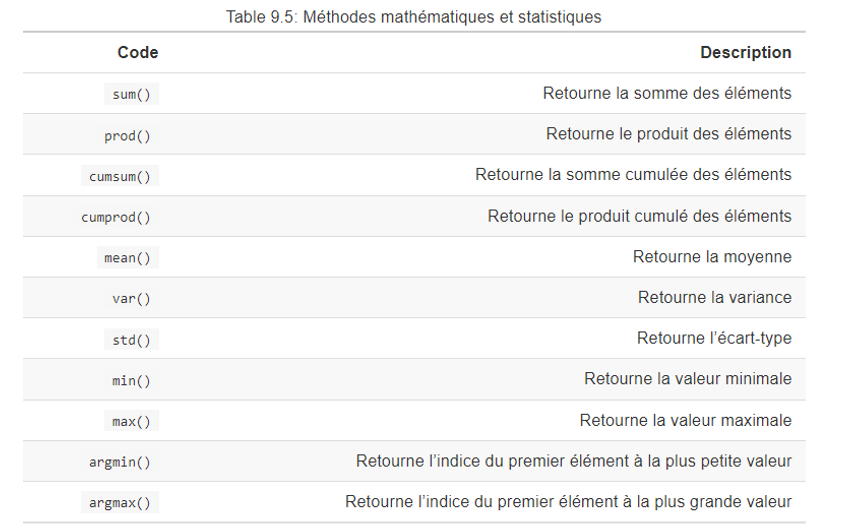

> ## modifier un tableau <a class="anchor" id="modif"></a>

**remplacer un ou plusieurs éléments**  
Comme pour les listes il suffit de renseigner l(es) indice(s)  de(s) l'élément(s) suivi d'un egal

In [52]:
#créons un tableau de dimension 3x3 pour des valeurs comprises entre 0 et 10 avec un seed de 0
np.random.seed(0)   
tab = np.random.randint(10, size=(3,3))
print(tab)

[[5 0 3]
 [3 7 9]
 [3 5 2]]


In [53]:
#remplaçons l'élément central par un 1
tab[1,1]=1
print (tab)

[[5 0 3]
 [3 1 9]
 [3 5 2]]


In [48]:
#si l'on ne renseigne qu'un indice 
tab[2] = 0
tab
#c'est les éléments de toutes la ligne qui sont remplacées

array([[5, 0, 3],
       [3, 1, 9],
       [0, 0, 0]])

**ajouter/supprimer un ou plusieurs éléments**  
- pour ajouter des éléments on utilise la fonction append()
- pour supprimer des éléments on utilise la fonction delete()

In [54]:
#soit un tableau de dimension 3x3
array=np.array([[1,2,3],[4,5,6],[7,8,9]])
print(array)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [55]:
#on supprime la ligne d'indice 2
print(np.delete(array,2,axis=0))     # axis = 1 --> colonne // axis = 0 --> ligne

[[1 2 3]
 [4 5 6]]


In [66]:
# Soit un tableau  1d
array1d = np.array([1,3,5]) 
print(array1d)

[1 3 5]


In [67]:
#on souhaite ajouter 1 élément 
#array1d = np.append(array1d,9)
array1d = np.append(array1d,[9], axis= 0)
print(array1d)

[1 3 5 9]


In [21]:
# soit un tableau 2d
array2d = np.array([[1,3],[9,4]])
print(array2d)

[[1 3]
 [9 4]]


In [22]:
# on souhaite ajouter une colonne contenant les éléments suivants 2 et 6
array2d = np.append(array2d,[[2],[6]], axis= 1)
#array2d = np.append(array2d,[2,6], axis= 1)
print(array2d)


[[1 3 2]
 [9 4 6]]


In [23]:
#autre variante
ajout_colonne  = np.array([[2],[6]])
#print(ajout_colonne) # 2,1 
array3d =np.append(array2d, ajout_colonne, axis=1)
print(array3d)

[[1 3 2 2]
 [9 4 6 6]]


[[2]
 [6]]
[[1 3 2]
 [9 4 6]]


**concaténer et fractionner**

- pour concaténer deux tableaux de même dimension : concatenate()
- pour concaténer deux tableaux de dimension différents, en verticale : vstack()  
- pour concaténer deux tableaux de dimension différents, en horizontale : hstack()  
- pour fractionner deux tableaux de même dimension : split()
- pour fractionner deux tableaux de dimension différents, en verticale : vsplit()  
- pour fractionner deux tableaux de dimension différents, en horizontale : hsplit()


In [76]:
#soit 2 tableaux de même dimension 3X3
array1=np.array([[1,2,3],[4,5,6],[7,8,9]])
array2=np.array([[2,5,6],[9,10,11],[5,6,9]])

In [77]:
print(array1)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [78]:
print(array2)

[[ 2  5  6]
 [ 9 10 11]
 [ 5  6  9]]


In [165]:
# on concatène par ligne
print(np.concatenate([array1,array2], axis=0))

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [ 2  5  6]
 [ 9 10 11]
 [ 5  6  9]]


In [166]:
# on concatène par colonne 
print(np.concatenate([array1,array2], axis=1))

[[ 1  2  3  2  5  6]
 [ 4  5  6  9 10 11]
 [ 7  8  9  5  6  9]]


In [80]:
#on definit un tableau de dim 1
array3=np.array([10,20,30]) # ligne 
array4=np.array([[10],[20],[30]]) # colonne

In [81]:
print(array3)

[10 20 30]


In [82]:
print(array4)

[[10]
 [20]
 [30]]


In [83]:
#concaténons à la verticale les tableaux 1 et 3
print(np.vstack([array1,array3]))

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 20 30]]


In [169]:
#concaténons à la horizontale les tableaux 1 et 4
print(np.hstack([array1,array4]))

[[ 1  2  3 10]
 [ 4  5  6 20]
 [ 7  8  9 30]]


In [26]:
#pour fractionner, créons un tableau à 1 dimension 
array=np.array([15,16,17,12,49,52,12,14,36])
print(array)

[15 16 17 12 49 52 12 14 36]


In [27]:
#séparons le en 3 tableaux
array_split = np.split(array,3)

In [30]:
print(array_split)

[array([15, 16, 17]), array([12, 49, 52]), array([12, 14, 36])]


In [32]:
#pour accéder à un des split il suffit d'indiquer l'indice 
print(array_split[0])
print(array_split[2][1]) # pour accéder à un élément d'un des tableaux

[15 16 17]
14


In [33]:
#prenons maintenant le cas d'un tableau 3X3
array_ndim = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(array_ndim)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [45]:
#splittons le en 2  à la 1e ligne 
#split_ligne = np.vsplit(array_ndim, [1])
split_ligne = np.vsplit(array_ndim,[1])


In [46]:
print(split_ligne)

[array([[1, 2, 3]]), array([[4, 5, 6],
       [7, 8, 9]])]


In [48]:
#accéder à un élément d'un des tableaux 
print(split_ligne[1][1,2])
print(split_ligne[1][1][2])

9
9


In [92]:
print(split_ligne[0])

[[1 2 3]]


In [93]:
print(split_ligne[1])

[[4 5 6]
 [7 8 9]]


In [50]:
#splittons le en 2  à la 2e colonne 
split_col = np.hsplit(array_ndim, [2])
print(split_col)

[array([[1, 2],
       [4, 5],
       [7, 8]]), array([[3],
       [6],
       [9]])]


In [114]:
print(split_col[1][1,0])
print(split_col[1][1][0])

6
6


In [95]:
print(split_col[0])

[[1 2]
 [4 5]
 [7 8]]


In [96]:
print(split_col[1])

[[3]
 [6]
 [9]]


**Quelques méthodes utiles**  
- La copie d’un tableau, comme pour les listes  ne doit pas se faire avec le symbole égal (=). Cela crée seulement une référence. mais on utilisera la méthode copy ()  
- Numpy propose une fonction sort() qui permet de trier les valeurs d'un tableau. **attention** cela ne modifie pas l'ordre originel des valeurs du tableau. **à ne pas confondre avec la méthode .sort**

In [56]:
#prenons l'exemple suivant, on crée un tableau de 1 ligne de 10 valeurs 
# les valeurs prises sont aléatoires et comprises entre 0 et 100
np.random.seed(2)   
mon_tableau = np.random.randint(100, size=(1,10))
print(mon_tableau)

[[40 15 72 22 43 82 75  7 34 49]]


In [57]:
#j'utilise la fonction sort() de numpy pour trier mes valeurs
np.sort(mon_tableau)

array([[ 7, 15, 22, 34, 40, 43, 49, 72, 75, 82]])

In [58]:
#je vérifie si mon tableau est modifié
print(mon_tableau)

[[40 15 72 22 43 82 75  7 34 49]]


In [119]:
#Par contre si j'utilise la méthode .sort
mon_tableau.sort()

In [120]:
print(mon_tableau)

[[ 7 15 22 34 40 43 49 72 75 82]]


> ## comparaison et masque <a class="anchor" id="comparaison"></a>

Avec les tableaux Numpy, il est possible d’utiliser une matrice booléenne pour filtrer et comparer des tableaux Numpy.

In [126]:
#commençons par créer un tableau 6*6 random avec valeurs comprises entre 0 et 100 en fixant le seed à 0
np.random.seed(0)
tableau = np.random.randint(100,size=(6,6))  # création d'un tableau 6*6 random avec valeurs comprises entre 0 et 100 
print(tableau)

[[44 47 64 67 67  9]
 [83 21 36 87 70 88]
 [88 12 58 65 39 87]
 [46 88 81 37 25 77]
 [72  9 20 80 69 79]
 [47 64 82 99 88 49]]


In [127]:
#on veut savoir si les valeurs comprises dans notre tableau sont supérieur à 50
#pour se faire on crée un masque : c'est un tableau de même dimension mais avec des booléens 
masque = tableau>50
print(masque)

[[False False  True  True  True False]
 [ True False False  True  True  True]
 [ True False  True  True False  True]
 [False  True  True False False  True]
 [ True False False  True  True  True]
 [False  True  True  True  True False]]


In [128]:
#si l'on veut sélectionner uniquement le sous ensemble qui respecte la condition 
tableau[masque] 
tableau[tableau>50]  # synthaxe équivalente

array([64, 67, 67, 83, 87, 70, 88, 88, 58, 65, 87, 88, 81, 77, 72, 80, 69,
       79, 64, 82, 99, 88])

Nous pouvons utiliser de  nombreux autres opérateurs de comparaison pour comparer deux tableaux :

``tableau[tableau>=50]``  : on souhaite garder uniquement les valeurs supérieures ou égales à  50.  
``tableau[tableau<50]``   : on souhaite garder uniquement les valeurs strictement inférieures à 50.  
``tableau[tableau!=50]``  : on souhaite garder uniquement les valeurs différentes de 50.  
``tableau[tableau==50]``  : on souhaite garder uniquement les valeurs égales 50.  
``tableau[(tableau >=50) & (tableau <=70)]``  :  on souhaite garder uniquement les valeurs comprises entre 50 et 70 inclusivement.  
``tableau[(tableau>=50) | (tableau<=40)] ``   :  on souhaite garder uniquement les valeurs non comprises entre 40 et 50.   

# La librairie pandas <a class="anchor" id="pandas"></a>

Pandas est une bibliothèque spécialisée dans la manipulation de données. Cette bibliothèque regroupe un ensemble de fonctions optimisées pour manipuler de gros jeux de données.Cette librairie est basée sur Numpy.  Elle permet de créer et exporter des tables de données à partir de fichiers textes (séparateurs, .csv, format fixe, compressés), binaires (HDF5 avec Pytable), HTML, XML, JSON, MongoDB, SQL…  
Une nouvelle structure de donnée est utilisée avec cette bibliothèque: le DataFrame . Il existe deux types de données avec pandas: les séries et les dataframes.  

Les particularités des dataframes : 
- Un dataframe est un tableau qui est créé avec des dictionnaires ou des listes.
- Ils sont basés sur des tableaux Numpy ou ndarray
- Ils peuvent avoir des noms de colonnes et des noms de lignes
- Ils ont la particularité de pouvoir mélanger les types de données: str, float, Nan, Int…
- On peut les visualiser comme une feuille Excel mais avec un nombre important de volumes de données ainsi qu’un nombre importants de fonctions et attributs.  

Les particularités des séries : 
- ce sont des tableaux à une dimensions (array) de données indexées
- un dataframe est en réalité un ensemble de séries
- on pourra utiliser les fonctions mathématiques que vues précédement pour les arrays np comme par exemple min() max() ...

> ## création et manipulation de série <a class="anchor" id="serie"></a>

Il existe plusieurs façons de créer une série:  
- soit en utilisant une liste
- soit en utlisant un dictionnaire

In [60]:
#import du module
import pandas as pd

In [61]:
#création d'une série à partir d'une liste
ma_liste = [11,15,12,13,14]
serie = pd.Series(ma_liste)
print(serie)

0    11
1    15
2    12
3    13
4    14
dtype: int64


In [62]:
#création d'une série à partir d'un dictionnaire
mon_dico ={"Montréal":11,"Ottawa":15,"Toronto":12, "Québec": 13  }

ma_serie = pd.Series(mon_dico)
print(ma_serie)

Montréal    11
Ottawa      15
Toronto     12
Québec      13
dtype: int64


In [63]:
# ou bien directement en renseignant des valeurs et les index associés
ma_serie = pd.Series([11,15,12,13] ,index=["Montréal", "Ottawa", "Toronto", "Québec"])
print(ma_serie)

Montréal    11
Ottawa      15
Toronto     12
Québec      13
dtype: int64


In [64]:
#pour accéder aux toutes les valeurs d'une série
ma_serie.values

array([11, 15, 12, 13], dtype=int64)

In [65]:
#pour accéder à une valeur en particulier on se sert de l'index ou du numero de l'index
print(ma_serie['Québec'])
print(ma_serie[3])

13
13


In [13]:
# pour accéder aux index
ma_serie.index

Index(['Montréal', 'Ottawa', 'Toronto', 'Québec'], dtype='object')

In [8]:
#on peut attribuer un nom à la série ainsi qu'à l'index
ma_serie.name = 'score'
ma_serie.index.name = 'ville'
print(ma_serie)

ville
Montréal    11
Ottawa      15
Toronto     12
Québec      13
Name: score, dtype: int64


In [16]:
# pour savoir ce que contient notre serie on utilise la méthode describe
ma_serie.describe()

count     4.000000
mean     12.750000
std       1.707825
min      11.000000
25%      11.750000
50%      12.500000
75%      13.500000
max      15.000000
Name: score, dtype: float64

In [67]:
# la valeur min de notre série
print(ma_serie.min())
print(ma_serie.max())

11


> ## création d'un dataframe<a class="anchor" id="creationdf"></a>


En règle générale, un DataFrame est créé en chargeant des jeux de données à partir du stockage existant, le stockage peut être par exemple une base de données SQL, un fichier CSV ou un fichier Excel.  
Le DataFrame peut aussi être créé à partir de listes, d’un dictionnaire et d’une liste de dictionnaires, etc.

In [9]:
import numpy as np
import pandas as pd

In [10]:
#pour savoir ou nous sommes dans l'ordinateur, ou est stocké mon notebook
import os
chemin = os.getcwd()
print(chemin)

C:\Users\barba\Desktop\formation_python\version_enseignant\support_de_cours


In [11]:
#pour lister tous mes dossiers, fichiers et notebooks à l'endroit ou je me trouve
os.listdir()

['.ipynb_checkpoints',
 'decouverte_des_librairies.ipynb',
 'fichier',
 'fichier_csv_export.csv',
 'fichier_json_export.json',
 'France.txt',
 'les_bases_du_langage.ipynb']

In [122]:
# création d'un dataframe à partir d'un array numpy
array_meteo = np.genfromtxt("./fichier/meteo_france_donnees_covid19.csv", delimiter=';',  dtype=str)  
print(array_meteo)

[['POSTE' 'NOM' 'LON' ... 'QDHUMI80' 'UM' 'QUM']
 ['01089001' 'AMBERIEU' '5Â°19\'45"E' ... 't' '97' 'v']
 ['01089001' 'AMBERIEU' '5Â°19\'45"E' ... 't' '86' 'v']
 ...
 ['95527001' 'ROISSY' '2Â°32\'03"E' ... 't' '60' 'v']
 ['95527001' 'ROISSY' '2Â°32\'03"E' ... 't' '56' 'v']
 ['95527001' 'ROISSY' '2Â°32\'03"E' ... 't' '61' 'v']]


In [13]:
df_meteo = pd.DataFrame(array_meteo[1:,:], columns = array_meteo[0])
print(df_meteo) #affichage 1
df_meteo #affichage 2 --> plus agréable à lire

          POSTE       NOM         LON          LAT  ALT      DATE   RR QRR  \
0      01089001  AMBERIEU  5Â°19'45"E  45Â°58'35"N  250  20200101  0,0   v   
1      01089001  AMBERIEU  5Â°19'45"E  45Â°58'35"N  250  20200102  0,0   v   
2      01089001  AMBERIEU  5Â°19'45"E  45Â°58'35"N  250  20200103  0,4   v   
3      01089001  AMBERIEU  5Â°19'45"E  45Â°58'35"N  250  20200104  0,6   v   
4      01089001  AMBERIEU  5Â°19'45"E  45Â°58'35"N  250  20200105  0,0   v   
...         ...       ...         ...          ...  ...       ...  ...  ..   
53419  95527001    ROISSY  2Â°32'03"E  49Â°00'54"N  108  20210417  0,0   v   
53420  95527001    ROISSY  2Â°32'03"E  49Â°00'54"N  108  20210418  0,0   v   
53421  95527001    ROISSY  2Â°32'03"E  49Â°00'54"N  108  20210419  0,0   v   
53422  95527001    ROISSY  2Â°32'03"E  49Â°00'54"N  108  20210420  0,0   v   
53423  95527001    ROISSY  2Â°32'03"E  49Â°00'54"N  108  20210421  0,0   v   

         TN QTN  ...  UN QUN  UX QUX DHUMI40 QDHUMI40 DHUMI80 Q

On peut également créer un dataframe à partir de séries. Les séries seront les colonnes du dataframe.  
Au niveau  syntaxe, on utilise des dictionnaires pour créer un dataframe avec des séries

In [123]:
#on définit une première série 
# les valeurs sont des notes d'étudiants : 11 15 15 11  /// 14 16 10 12 12
#et les index le nom d'étudiants : Fred Pierre Marie Lise /// Damien Samuel Marie Lise Fred
serie_1 = pd.Series([11,15,15,11], index=['Fred', 'Pierre', 'Marie', 'Lise'])
serie_2 = pd.Series([14,16,10,12,12], index=['Damien','Samuel', 'Marie', 'Lise','Fred'])

In [124]:
df = pd.DataFrame( {"Note1":serie_1, "Note2":serie_2} )
print(df)

        Note1  Note2
Damien    NaN   14.0
Fred     11.0   12.0
Lise     11.0   12.0
Marie    15.0   10.0
Pierre   15.0    NaN
Samuel    NaN   16.0


On peut également créer un dataframe directement à partir d'un fichier csv ou Excel

In [14]:
df_meteo = pd.read_csv("./fichier/meteo_france_donnees_covid19.csv", delimiter=';',encoding='utf-8') 
df_meteo

,POSTE,NOM,LON,LAT,ALT,DATE,RR,QRR,TN,QTN,...,UN,QUN,UX,QUX,DHUMI40,QDHUMI40,DHUMI80,QDHUMI80,UM,QUM
0,1089001,AMBERIEU,"5°19'45""E","45°58'35""N",250,20200101,"0,0",v,"-2,2",v,...,97.0,v,98.0,v,0.0,t,1440.0,t,97.0,v
1,1089001,AMBERIEU,"5°19'45""E","45°58'35""N",250,20200102,"0,0",v,"-1,8",v,...,69.0,v,99.0,v,0.0,t,860.0,t,86.0,v
2,1089001,AMBERIEU,"5°19'45""E","45°58'35""N",250,20200103,"0,4",v,"3,3",v,...,71.0,v,95.0,v,0.0,t,620.0,t,81.0,v
3,1089001,AMBERIEU,"5°19'45""E","45°58'35""N",250,20200104,"0,6",v,"3,4",v,...,74.0,v,97.0,v,0.0,t,1168.0,t,89.0,v
4,1089001,AMBERIEU,"5°19'45""E","45°58'35""N",250,20200105,"0,0",v,"-3,4",v,...,77.0,v,97.0,v,0.0,t,1395.0,t,92.0,v
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53419,95527001,ROISSY,"2°32'03""E","49°00'54""N",108,20210417,"0,0",v,"2,6",v,...,36.0,v,89.0,v,239.0,t,357.0,t,62.0,v
53420,95527001,ROISSY,"2°32'03""E","49°00'54""N",108,20210418,"0,0",v,"2,0",v,...,45.0,v,90.0,v,0.0,t,349.0,t,66.0,v
53421,95527001,ROISSY,"2°32'03""E","49°00'54""N",108,20210419,"0,0",v,"3,3",v,...,36.0,v,86.0,v,226.0,t,403.0,t,60.0,v
53422,95527001,ROISSY,"2°32'03""E","49°00'54""N",108,20210420,"0,0",v,"5,7",v,...,28.0,v,85.0,v,358.0,t,215.0,t,56.0,v


In [17]:
#df_meteo              # toutes les données sont affichées
#df_meteo.head(10)     # affichage des 5 premières lignes
df_meteo.tail(5)       # affichage des 5 dernières lignes

,POSTE,NOM,LON,LAT,ALT,DATE,RR,QRR,TN,QTN,...,UN,QUN,UX,QUX,DHUMI40,QDHUMI40,DHUMI80,QDHUMI80,UM,QUM
53419,95527001,ROISSY,"2°32'03""E","49°00'54""N",108,20210417,"0,0",v,"2,6",v,...,36.0,v,89.0,v,239.0,t,357.0,t,62.0,v
53420,95527001,ROISSY,"2°32'03""E","49°00'54""N",108,20210418,"0,0",v,"2,0",v,...,45.0,v,90.0,v,0.0,t,349.0,t,66.0,v
53421,95527001,ROISSY,"2°32'03""E","49°00'54""N",108,20210419,"0,0",v,"3,3",v,...,36.0,v,86.0,v,226.0,t,403.0,t,60.0,v
53422,95527001,ROISSY,"2°32'03""E","49°00'54""N",108,20210420,"0,0",v,"5,7",v,...,28.0,v,85.0,v,358.0,t,215.0,t,56.0,v
53423,95527001,ROISSY,"2°32'03""E","49°00'54""N",108,20210421,"0,0",v,"6,5",v,...,36.0,v,84.0,v,40.0,t,151.0,t,61.0,v


Ou bien à partir d'un fichier txt avec la methode read_table()

In [21]:
df_meteo2 = pd.read_table("./fichier/meteo_france_donnees_covid19.txt")
df_meteo2.head(5)

,POSTE,NOM,LON,LAT,ALT,DATE,RR,QRR,TN,QTN,...,UN,QUN,UX,QUX,DHUMI40,QDHUMI40,DHUMI80,QDHUMI80,UM,QUM
0,1089001,AMBERIEU,"5Â°19'45""E","45Â°58'35""N",250,20200101,0,v,"-2,2",v,...,97.0,v,98.0,v,0.0,t,1440.0,t,97.0,v
1,1089001,AMBERIEU,"5Â°19'45""E","45Â°58'35""N",250,20200102,0,v,"-1,8",v,...,69.0,v,99.0,v,0.0,t,860.0,t,86.0,v
2,1089001,AMBERIEU,"5Â°19'45""E","45Â°58'35""N",250,20200103,"0,4",v,"3,3",v,...,71.0,v,95.0,v,0.0,t,620.0,t,81.0,v
3,1089001,AMBERIEU,"5Â°19'45""E","45Â°58'35""N",250,20200104,"0,6",v,"3,4",v,...,74.0,v,97.0,v,0.0,t,1168.0,t,89.0,v
4,1089001,AMBERIEU,"5Â°19'45""E","45Â°58'35""N",250,20200105,0,v,"-3,4",v,...,77.0,v,97.0,v,0.0,t,1395.0,t,92.0,v


Ou bien à partir d'un fichier Excel avec la methode read_excel()

In [22]:
df_meteo2 = pd.read_excel("./fichier/meteo_france_donnees_covid19.xlsx")
df_meteo2.head(5)

,POSTE,NOM,LON,LAT,ALT,DATE,RR,QRR,TN,QTN,...,UN,QUN,UX,QUX,DHUMI40,QDHUMI40,DHUMI80,QDHUMI80,UM,QUM
0,1089001,AMBERIEU,"5Â°19'45""E","45Â°58'35""N",250,20200101,0.0,v,-2.2,v,...,97.0,v,98.0,v,0.0,t,1440.0,t,97.0,v
1,1089001,AMBERIEU,"5Â°19'45""E","45Â°58'35""N",250,20200102,0.0,v,-1.8,v,...,69.0,v,99.0,v,0.0,t,860.0,t,86.0,v
2,1089001,AMBERIEU,"5Â°19'45""E","45Â°58'35""N",250,20200103,0.4,v,3.3,v,...,71.0,v,95.0,v,0.0,t,620.0,t,81.0,v
3,1089001,AMBERIEU,"5Â°19'45""E","45Â°58'35""N",250,20200104,0.6,v,3.4,v,...,74.0,v,97.0,v,0.0,t,1168.0,t,89.0,v
4,1089001,AMBERIEU,"5Â°19'45""E","45Â°58'35""N",250,20200105,0.0,v,-3.4,v,...,77.0,v,97.0,v,0.0,t,1395.0,t,92.0,v


> ## accéder aux données <a class="anchor" id="manipdf"></a>

**quelques méthodes utiles pour l'exploration de données**

Ils existent une mutlitude de fonctions et méthodes que l'on peut appliquer sur les DataFrame.  
N'hésitez pas à consulter la documentation pour en savoir plus :  
https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.html  
Nous tâcherons par la suite de présenter celles qui nous seront les plus utiles lorsque l'on cherche à explorer et nettoyer un jeu de données.


In [23]:
#reprenons le fichier csv contenant les informations météo sur la période covid:
df_meteo = pd.read_csv("./fichier/meteo_france_donnees_covid19.csv", delimiter=';',encoding='utf-8')
df_meteo

,POSTE,NOM,LON,LAT,ALT,DATE,RR,QRR,TN,QTN,...,UN,QUN,UX,QUX,DHUMI40,QDHUMI40,DHUMI80,QDHUMI80,UM,QUM
0,1089001,AMBERIEU,"5°19'45""E","45°58'35""N",250,20200101,"0,0",v,"-2,2",v,...,97.0,v,98.0,v,0.0,t,1440.0,t,97.0,v
1,1089001,AMBERIEU,"5°19'45""E","45°58'35""N",250,20200102,"0,0",v,"-1,8",v,...,69.0,v,99.0,v,0.0,t,860.0,t,86.0,v
2,1089001,AMBERIEU,"5°19'45""E","45°58'35""N",250,20200103,"0,4",v,"3,3",v,...,71.0,v,95.0,v,0.0,t,620.0,t,81.0,v
3,1089001,AMBERIEU,"5°19'45""E","45°58'35""N",250,20200104,"0,6",v,"3,4",v,...,74.0,v,97.0,v,0.0,t,1168.0,t,89.0,v
4,1089001,AMBERIEU,"5°19'45""E","45°58'35""N",250,20200105,"0,0",v,"-3,4",v,...,77.0,v,97.0,v,0.0,t,1395.0,t,92.0,v
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53419,95527001,ROISSY,"2°32'03""E","49°00'54""N",108,20210417,"0,0",v,"2,6",v,...,36.0,v,89.0,v,239.0,t,357.0,t,62.0,v
53420,95527001,ROISSY,"2°32'03""E","49°00'54""N",108,20210418,"0,0",v,"2,0",v,...,45.0,v,90.0,v,0.0,t,349.0,t,66.0,v
53421,95527001,ROISSY,"2°32'03""E","49°00'54""N",108,20210419,"0,0",v,"3,3",v,...,36.0,v,86.0,v,226.0,t,403.0,t,60.0,v
53422,95527001,ROISSY,"2°32'03""E","49°00'54""N",108,20210420,"0,0",v,"5,7",v,...,28.0,v,85.0,v,358.0,t,215.0,t,56.0,v


In [2]:
#pour avoir des informations générales sur le contenu du dataset
df_meteo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53424 entries, 0 to 53423
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   POSTE     53424 non-null  int64  
 1   NOM       53424 non-null  object 
 2   LON       53424 non-null  object 
 3   LAT       53424 non-null  object 
 4   ALT       53424 non-null  int64  
 5   DATE      53424 non-null  int64  
 6   RR        53424 non-null  object 
 7   QRR       53424 non-null  object 
 8   TN        53424 non-null  object 
 9   QTN       53424 non-null  object 
 10  TX        53424 non-null  object 
 11  QTX       53424 non-null  object 
 12  TM        53325 non-null  object 
 13  QTM       53326 non-null  object 
 14  FFM       53129 non-null  object 
 15  QFFM      53184 non-null  object 
 16  UN        53395 non-null  float64
 17  QUN       53398 non-null  object 
 18  UX        53391 non-null  float64
 19  QUX       53396 non-null  object 
 20  DHUMI40   53209 non-null  fl

In [24]:
# pour obtenir quelques statistiques sur les variables numériques
df_meteo.describe() # ne va prendre en compte que les colonnes dont dtype est int ou float 

,POSTE,ALT,DATE,UN,UX,DHUMI40,DHUMI80,UM
count,5.342400e+04,53424.000000,5.342400e+04,53395.000000,53391.000000,53209.000000,53176.000000,53318.000000
mean,4.548673e+07,189.089286,2.020290e+07,52.812735,91.760596,97.157661,691.450842,74.190817
std,2.716715e+07,185.656061,4.062004e+03,18.431993,8.787114,200.902560,461.490894,13.992448
min,1.089001e+06,1.000000,2.020010e+07,7.000000,28.000000,0.000000,0.000000,23.000000
25%,2.013950e+07,70.000000,2.020043e+07,38.000000,89.000000,0.000000,325.000000,64.000000
50%,4.354100e+07,138.500000,2.020083e+07,52.000000,95.000000,0.000000,668.000000,76.000000
75%,6.909650e+07,235.000000,2.020122e+07,67.000000,98.000000,37.000000,1060.000000,85.000000
max,9.552700e+07,932.000000,2.021042e+07,100.000000,100.000000,1440.000000,1440.000000,100.000000


In [4]:
# pour ne visualiser que les 1ère ou dernière lignes
df_meteo.head(5)
#df_meteo.tail(5)

,POSTE,NOM,LON,LAT,ALT,DATE,RR,QRR,TN,QTN,...,UN,QUN,UX,QUX,DHUMI40,QDHUMI40,DHUMI80,QDHUMI80,UM,QUM
0,1089001,AMBERIEU,"5°19'45""E","45°58'35""N",250,20200101,"0,0",v,"-2,2",v,...,97.0,v,98.0,v,0.0,t,1440.0,t,97.0,v
1,1089001,AMBERIEU,"5°19'45""E","45°58'35""N",250,20200102,"0,0",v,"-1,8",v,...,69.0,v,99.0,v,0.0,t,860.0,t,86.0,v
2,1089001,AMBERIEU,"5°19'45""E","45°58'35""N",250,20200103,"0,4",v,"3,3",v,...,71.0,v,95.0,v,0.0,t,620.0,t,81.0,v
3,1089001,AMBERIEU,"5°19'45""E","45°58'35""N",250,20200104,"0,6",v,"3,4",v,...,74.0,v,97.0,v,0.0,t,1168.0,t,89.0,v
4,1089001,AMBERIEU,"5°19'45""E","45°58'35""N",250,20200105,"0,0",v,"-3,4",v,...,77.0,v,97.0,v,0.0,t,1395.0,t,92.0,v


In [5]:
#pour connaitre le nom de nos colonnes
df_meteo.columns

Index(['POSTE', 'NOM', 'LON', 'LAT', 'ALT', 'DATE', 'RR', 'QRR', 'TN', 'QTN',
       'TX', 'QTX', 'TM', 'QTM', 'FFM', 'QFFM', 'UN', 'QUN', 'UX', 'QUX',
       'DHUMI40', 'QDHUMI40', 'DHUMI80', 'QDHUMI80', 'UM', 'QUM'],
      dtype='object')

In [6]:
#pour connaître le type de variables
df_meteo.dtypes

POSTE         int64
NOM          object
LON          object
LAT          object
ALT           int64
DATE          int64
RR           object
QRR          object
TN           object
QTN          object
TX           object
QTX          object
TM           object
QTM          object
FFM          object
QFFM         object
UN          float64
QUN          object
UX          float64
QUX          object
DHUMI40     float64
QDHUMI40     object
DHUMI80     float64
QDHUMI80     object
UM          float64
QUM          object
dtype: object

In [7]:
# pour connaître la dimension d'un dataset
df_meteo.shape

(53424, 26)

In [25]:
#pour connaitre le nom des valeurs uniques
pd.unique(df_meteo['NOM'])
df_meteo['NOM'].unique() # alternative 1
df_meteo.NOM.unique()   #alternative 2

array(['AMBERIEU', 'ST QUENTIN', 'VICHY-CHARMEIL', 'MONTLUCON AERO',
       'DIGNE LES BAINS', 'EMBRUN', 'GAP', 'NICE', 'LANAS SYN',
       'CHARLEVILLE-MEZ', 'COS', 'TROYES-BARBEREY', 'CARCASSONNE',
       'NARBONNE', 'RODEZ-AVEYRON', 'MARIGNANE', 'MARSEILLE',
       'CAEN-CARPIQUET', 'AURILLAC', 'ANGOULEME - BRIE - CHAMPNIERS',
       'COGNAC', 'LA ROCHELLE-ILE DE RE', 'BOURGES', 'AVORD', 'BRIVE',
       'BRIVE-SOUILLAC', 'AJACCIO', 'FIGARI', 'BASTIA', 'DIJON-LONGVIC',
       'ST BRIEUC', 'GUERET-ST LAURENT', 'COULOUNIEIX', 'BESANCON',
       'VALENCE-CHABEUI', 'EVREUX-HUEST', 'CHARTRES', 'BREST-GUIPAVAS',
       'QUIMPER', 'NIMES-COURBESSAC', 'NIMES-GARONS', 'TOULOUSE-BLAGNAC',
       'AUCH', 'BORDEAUX-MERIGNAC', 'CAZAUX', 'MONTPELLIER-AEROPORT',
       'DINARD', 'RENNES-ST JACQUES', 'CHATEAUROUX  DEOLS', 'TOURS',
       'GRENOBLE-ST GEOIRS', 'TAVAUX SA', 'MONT-DE-MARSAN', 'BLOIS',
       'ST ETIENNE-BOUTHEON', 'LE PUY-LOUDES', 'NANTES-BOUGUENAIS',
       'ORLEANS', 'LE MONTAT', 'AG

In [141]:
#pour connaitre le nombre des valeurs uniques
len(pd.unique(df_meteo['NOM']))

112

**accéder à des éléments**

Il existe principalement 2 méthodes pour accéder à des valeurs d'un dataframe:
- la méthode iloc[  ]--> principalement basé sur les positions à l'aide d'entiers, lorsque l'on veut extraire des valeurs localisées on utilise l'index [indice_ligne, indice_colonne]
- la méthode loc[  ] --> principalement basé sur le label des axes, on utilise le nom des lignes et des colonnes 

In [1]:
#prenons un exemple simple
import pandas as pd
import numpy as np
num_student=[501,502,503,504,505]
student_df = pd.DataFrame({
    'Name': ['Alice', 'Steven', 'Neesham', 'Chris', 'Alice'],
    'Age':  [17, 20, 18, 21, 15],
    'City': ['New York', 'Portland', 'Boston', 'Seattle', 'Austin'],
    'Grade': ['A', 'B-', 'B+', 'A-', 'A']
},index=num_student)

print(student_df)

        Name  Age      City Grade
501    Alice   17  New York     A
502   Steven   20  Portland    B-
503  Neesham   18    Boston    B+
504    Chris   21   Seattle    A-
505    Alice   15    Austin     A


In [3]:
#approche loc
#on veut accéder à la valeur du "grade" de l'étudiant ayant le numéro étudiant 504
value = student_df.loc[504,'Grade']
#value = student_df.iloc[3,3] --> équivalence avec iloc 
print(value)
# on a donc dataframe.loc[nom_index,nom_colonne]


A-


In [8]:
#si l'on veut filtrer des colonnes 
value = student_df.loc[:, ["Name", "Age"]]
#différentes alternatives
#value = student_df[["Name", "Age"]]
#value = student_df.iloc[:,0:2]
#value = student_df.iloc[:,[0, 1]]
print(value)

        Name  Age
501    Alice   17
502   Steven   20
503  Neesham   18
504    Chris   21
505    Alice   15


In [36]:
#si l'on veut filtrer des lignes et des colonnes 
#exemple: je veux uniquement les colonnes nom et grade pour les étudiants ayant un numéro étudiant supérieur à 502
value = student_df.loc[ [502, 503, 504, 505], ["Name", "Grade"]]
#value = student_df.loc[502:, ["Name", "Grade"]] #variante
print(value)

        Name Grade
502   Steven    B-
503  Neesham    B+
504    Chris    A-
505    Alice     A


In [149]:
#si l'on veut filtrer des lignes en appliquant une condition
# par exemple, on veut sélectionner les étudiants ayant eu un grade A
#value = student_df['Grade'] == 'A'
value = student_df.loc[student_df['Grade'] == 'A']
print(value)

      Name  Age      City Grade
501  Alice   17  New York     A
505  Alice   15    Austin     A


In [46]:
#approche iloc
#on souhaite filtrer des lignes ayant un indice particulier
value = student_df.iloc[[3,4]] # on met 2 paires de crochets; la première : le tableau, la 2e c'est pour accéder aux lignes 
print(value)

      Name  Age     City Grade
504  Chris   21  Seattle    A-
505  Alice   15   Austin     A


In [154]:
# ou filtrer en fonction d'indice de lignes et de colonnes
value = student_df.iloc[[3,4], [1,2]]
print(value)
#on peut également filtrer une plage de valeur avec les :

     Age     City
504   21  Seattle
505   15   Austin


**faire des boucles dans un dataframe**


In [47]:
#reprenons notre data_frame de données météo et affichons les 10 premières lignes seulement des colonnes NOM DATE et TN
df_meteo[['NOM','DATE','TN']].head(10)

,NOM,DATE,TN
0,AMBERIEU,20200101,"-2,2"
1,AMBERIEU,20200102,"-1,8"
2,AMBERIEU,20200103,"3,3"
3,AMBERIEU,20200104,"3,4"
4,AMBERIEU,20200105,"-3,4"
5,AMBERIEU,20200106,"-4,6"
6,AMBERIEU,20200107,"-0,8"
7,AMBERIEU,20200108,"-1,2"
8,AMBERIEU,20200109,"0,3"
9,AMBERIEU,20200110,"5,9"


In [49]:
#pour plus de commodité on l'appellera :
df1_meteo = df_meteo[['NOM','DATE','TN']].head(10)

In [51]:
#pour boucler sur chaque ligne
for i in df1_meteo.iterrows():
    print('affichage de ma ligne : ', i)
    

affichage de ma ligne :  (0, NOM     AMBERIEU
DATE    20200101
TN          -2,2
Name: 0, dtype: object)
affichage de ma ligne :  (1, NOM     AMBERIEU
DATE    20200102
TN          -1,8
Name: 1, dtype: object)
affichage de ma ligne :  (2, NOM     AMBERIEU
DATE    20200103
TN           3,3
Name: 2, dtype: object)
affichage de ma ligne :  (3, NOM     AMBERIEU
DATE    20200104
TN           3,4
Name: 3, dtype: object)
affichage de ma ligne :  (4, NOM     AMBERIEU
DATE    20200105
TN          -3,4
Name: 4, dtype: object)
affichage de ma ligne :  (5, NOM     AMBERIEU
DATE    20200106
TN          -4,6
Name: 5, dtype: object)
affichage de ma ligne :  (6, NOM     AMBERIEU
DATE    20200107
TN          -0,8
Name: 6, dtype: object)
affichage de ma ligne :  (7, NOM     AMBERIEU
DATE    20200108
TN          -1,2
Name: 7, dtype: object)
affichage de ma ligne :  (8, NOM     AMBERIEU
DATE    20200109
TN           0,3
Name: 8, dtype: object)
affichage de ma ligne :  (9, NOM     AMBERIEU
DATE    20200110
T

In [53]:
#pour boucler sur chaque colonne 
for key,value in df1_meteo.items():
    print(key)
    print(value)

NOM
0    AMBERIEU
1    AMBERIEU
2    AMBERIEU
3    AMBERIEU
4    AMBERIEU
5    AMBERIEU
6    AMBERIEU
7    AMBERIEU
8    AMBERIEU
9    AMBERIEU
Name: NOM, dtype: object
DATE
0    20200101
1    20200102
2    20200103
3    20200104
4    20200105
5    20200106
6    20200107
7    20200108
8    20200109
9    20200110
Name: DATE, dtype: int64
TN
0    -2,2
1    -1,8
2     3,3
3     3,4
4    -3,4
5    -4,6
6    -0,8
7    -1,2
8     0,3
9     5,9
Name: TN, dtype: object


> ## nettoyage d'un dataframe <a class="anchor" id="datacleaning"></a>

Une fois que l'on a exploré grossièrement le contenu de notre dataset, vient l'étape de nettoyage. Cette étape est généralement la plus fastidieuse et longue car elle necessite de bien repérer toutes les erreurs possibles qui se seraient glissées dans nos données. Pour ce faire , nous disposons de nombreuses méthodes et fonctions proposées par pandas.  
Généralement le nettoyage consiste à: 
- repérer des valeurs manquantes ou/et erronées
- remplacer des valeurs
- supprimer des lignes / colonnes
- ajouter des lignes  / colonnes
- modifier le nom colonne et/ou la valeur des indexs pour plus de compréhension 
- grouper des données en fonction de certains critères pour créer de nouvelles variables  
Dans ce qui suit nous allons voir des exemples simples de chacune de ces problématiques.Et nous verrons certains un peu plus complexes en exercice.

**repérer des valeurs manquantes**

In [108]:
#pour savoir s'il y a des valeurs nulles de type NaN 
#on imbrique 2 méthodes 
df_meteo.isnull().sum()
# on remarquera que la colonne FFM est celle qui a le plus de valeurs manquantes

POSTE         0
NOM           0
LON           0
LAT           0
ALT           0
DATE          0
RR            0
QRR           0
TN            0
QTN           0
TX            0
QTX           0
TM           99
QTM          98
FFM         295
QFFM        240
UN           29
QUN          26
UX           33
QUX          28
DHUMI40     215
QDHUMI40    210
DHUMI80     248
QDHUMI80    240
UM          106
QUM         101
dtype: int64

In [167]:
#si l'on veut savoir le nombre de valeurs manquantes totales on devra sommer les valeurs manquantes par ligne et par colonne
df_meteo.isnull().sum().sum()

1968

In [117]:
#on peut également vérifier la presence de valeurs manquantes avec la méthode isna
df_meteo.isna().sum().sum()

1968

**remplacer des valeurs**

In [110]:
#avec la methode .replace()
df_meteo.head(15)

,POSTE,NOM,LON,LAT,ALT,DATE,RR,QRR,TN,QTN,...,UN,QUN,UX,QUX,DHUMI40,QDHUMI40,DHUMI80,QDHUMI80,UM,QUM
0,1089001,AMBERIEU,"5°19'45""E","45°58'35""N",250,20200101,"0,0",v,"-2,2",v,...,97.0,v,98.0,v,0.0,t,1440.0,t,97.0,v
1,1089001,AMBERIEU,"5°19'45""E","45°58'35""N",250,20200102,"0,0",v,"-1,8",v,...,69.0,v,99.0,v,0.0,t,860.0,t,86.0,v
2,1089001,AMBERIEU,"5°19'45""E","45°58'35""N",250,20200103,"0,4",v,"3,3",v,...,71.0,v,95.0,v,0.0,t,620.0,t,81.0,v
3,1089001,AMBERIEU,"5°19'45""E","45°58'35""N",250,20200104,"0,6",v,"3,4",v,...,74.0,v,97.0,v,0.0,t,1168.0,t,89.0,v
4,1089001,AMBERIEU,"5°19'45""E","45°58'35""N",250,20200105,"0,0",v,"-3,4",v,...,77.0,v,97.0,v,0.0,t,1395.0,t,92.0,v
5,1089001,AMBERIEU,"5°19'45""E","45°58'35""N",250,20200106,"0,0",v,"-4,6",v,...,58.0,v,97.0,v,0.0,t,920.0,t,83.0,v
6,1089001,AMBERIEU,"5°19'45""E","45°58'35""N",250,20200107,"0,0",v,"-0,8",v,...,82.0,v,96.0,v,0.0,t,1440.0,t,91.0,v
7,1089001,AMBERIEU,"5°19'45""E","45°58'35""N",250,20200108,"0,0",v,"-1,2",v,...,72.0,v,97.0,v,0.0,t,1085.0,t,87.0,v
8,1089001,AMBERIEU,"5°19'45""E","45°58'35""N",250,20200109,"3,2",v,"0,3",v,...,29.0,v,86.0,v,442.0,t,333.0,t,58.0,v
9,1089001,AMBERIEU,"5°19'45""E","45°58'35""N",250,20200110,"0,0",v,"5,9",v,...,61.0,v,92.0,v,0.0,t,418.0,t,75.0,v


In [168]:
#on souhaite remplacer le nom de la commune AMBERIEU par AMBERIEU-EN-BUGEY
df_meteo.replace('AMBERIEU', 'AMBERIEU-EN-BUGEY', inplace = True)
df_meteo.head(3)

,POSTE,NOM,LON,LAT,ALT,DATE,RR,QRR,TN,QTN,...,UN,QUN,UX,QUX,DHUMI40,QDHUMI40,DHUMI80,QDHUMI80,UM,QUM
0,1089001,AMBERIEU-EN-BUGEY,"5°19'45""E","45°58'35""N",250,20200101,"0,0",v,"-2,2",v,...,97.0,v,98.0,v,0.0,t,1440.0,t,97.0,v
1,1089001,AMBERIEU-EN-BUGEY,"5°19'45""E","45°58'35""N",250,20200102,"0,0",v,"-1,8",v,...,69.0,v,99.0,v,0.0,t,860.0,t,86.0,v
2,1089001,AMBERIEU-EN-BUGEY,"5°19'45""E","45°58'35""N",250,20200103,"0,4",v,"3,3",v,...,71.0,v,95.0,v,0.0,t,620.0,t,81.0,v


In [112]:
#on peut également remplacer des valeurs manquantes par des 0 avec la méthode fillna()
#faisons le uniquement sur la colonne FFM 
df_meteo['FFM']

0        NaN
1        NaN
2        2,3
3        3,8
4        1,3
        ... 
53419    5,3
53420    3,5
53421    2,7
53422    2,8
53423    5,3
Name: FFM, Length: 53424, dtype: object

In [113]:
df_meteo['FFM'].fillna(0)

0          0
1          0
2        2,3
3        3,8
4        1,3
        ... 
53419    5,3
53420    3,5
53421    2,7
53422    2,8
53423    5,3
Name: FFM, Length: 53424, dtype: object

**supprimer des lignes ou des colonnes**

In [169]:
#on peut supprimer les lignes ou colonnes contenant des valeurs nulles à l'aide de la méthode dropna
df_meteo['QFFM']

0          e
1        NaN
2          v
3          v
4          v
        ... 
53419      v
53420      v
53421      v
53422      v
53423      v
Name: QFFM, Length: 53424, dtype: object

In [134]:
df_meteo.dropna(axis = 0,subset = ['QFFM'], inplace= True) # supprime selon les index et 1 pour les colonnes
#verifions
df_meteo['QFFM']

0        e
2        v
3        v
4        v
5        v
        ..
53419    v
53420    v
53421    v
53422    v
53423    v
Name: QFFM, Length: 53184, dtype: object

remarque la methode dropna ne fonctionnera uniquement si vous prenez l'ensemble du dataframe et non une colonne.  
Si vous souhaitez supprimer les valeurs manquantes d'une ou de plusieurs colonne spécifiques, il faut utliser le paramètre subset !

**ajouter ou supprimer des colonnes**

In [187]:
#pour créer une nouvelle colonne
df_meteo['ma_nouvelle_colonne'] = df_meteo['UN']-df_meteo['UX']
df_meteo['ma_nouvelle_colonne']

0        -1.0
1       -30.0
2       -24.0
3       -23.0
4       -20.0
         ... 
53419   -53.0
53420   -45.0
53421   -50.0
53422   -57.0
53423   -48.0
Name: ma_nouvelle_colonne, Length: 53424, dtype: float64

In [188]:
#verifions que l'ajout a bien été pris en compte
df_meteo.shape

(53424, 28)

In [189]:
#et maintenant supprimons là à l'aide de la méthode drop 
df_meteo.drop(['ma_nouvelle_colonne'], axis=1, inplace = True)
df_meteo

,POSTE,COMMUNE,LON,LAT,ALT,DATE,RR,QRR,TEMPERATURE,QTN,...,QUN,UX,QUX,DHUMI40,QDHUMI40,DHUMI80,QDHUMI80,UM,QUM,ma_2e_nvelle_col
0,1089001,AMBERIEU-EN-BUGEY,"5°19'45""E","45°58'35""N",250,20200101,"0,0",v,"-2,2",v,...,v,98.0,v,0.0,t,1440.0,t,97.0,v,10
1,1089001,AMBERIEU-EN-BUGEY,"5°19'45""E","45°58'35""N",250,20200102,"0,0",v,"-1,8",v,...,v,99.0,v,0.0,t,860.0,t,86.0,v,10
2,1089001,AMBERIEU-EN-BUGEY,"5°19'45""E","45°58'35""N",250,20200103,"0,4",v,"3,3",v,...,v,95.0,v,0.0,t,620.0,t,81.0,v,10
3,1089001,AMBERIEU-EN-BUGEY,"5°19'45""E","45°58'35""N",250,20200104,"0,6",v,"3,4",v,...,v,97.0,v,0.0,t,1168.0,t,89.0,v,10
4,1089001,AMBERIEU-EN-BUGEY,"5°19'45""E","45°58'35""N",250,20200105,"0,0",v,"-3,4",v,...,v,97.0,v,0.0,t,1395.0,t,92.0,v,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53419,95527001,ROISSY,"2°32'03""E","49°00'54""N",108,20210417,"0,0",v,"2,6",v,...,v,89.0,v,239.0,t,357.0,t,62.0,v,10
53420,95527001,ROISSY,"2°32'03""E","49°00'54""N",108,20210418,"0,0",v,"2,0",v,...,v,90.0,v,0.0,t,349.0,t,66.0,v,10
53421,95527001,ROISSY,"2°32'03""E","49°00'54""N",108,20210419,"0,0",v,"3,3",v,...,v,86.0,v,226.0,t,403.0,t,60.0,v,10
53422,95527001,ROISSY,"2°32'03""E","49°00'54""N",108,20210420,"0,0",v,"5,7",v,...,v,85.0,v,358.0,t,215.0,t,56.0,v,10


**renommer des colonnes**

In [190]:
# on souhaite modifier le nom des colonnes NOM en commune et TN en temperature
#pd.options.mode.chained_assignment = None
df_meteo.rename(index=str, columns={"NOM": "COMMUNE","TN": "TEMPERATURE"}, inplace=True)
df_meteo

,POSTE,COMMUNE,LON,LAT,ALT,DATE,RR,QRR,TEMPERATURE,QTN,...,QUN,UX,QUX,DHUMI40,QDHUMI40,DHUMI80,QDHUMI80,UM,QUM,ma_2e_nvelle_col
0,1089001,AMBERIEU-EN-BUGEY,"5°19'45""E","45°58'35""N",250,20200101,"0,0",v,"-2,2",v,...,v,98.0,v,0.0,t,1440.0,t,97.0,v,10
1,1089001,AMBERIEU-EN-BUGEY,"5°19'45""E","45°58'35""N",250,20200102,"0,0",v,"-1,8",v,...,v,99.0,v,0.0,t,860.0,t,86.0,v,10
2,1089001,AMBERIEU-EN-BUGEY,"5°19'45""E","45°58'35""N",250,20200103,"0,4",v,"3,3",v,...,v,95.0,v,0.0,t,620.0,t,81.0,v,10
3,1089001,AMBERIEU-EN-BUGEY,"5°19'45""E","45°58'35""N",250,20200104,"0,6",v,"3,4",v,...,v,97.0,v,0.0,t,1168.0,t,89.0,v,10
4,1089001,AMBERIEU-EN-BUGEY,"5°19'45""E","45°58'35""N",250,20200105,"0,0",v,"-3,4",v,...,v,97.0,v,0.0,t,1395.0,t,92.0,v,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53419,95527001,ROISSY,"2°32'03""E","49°00'54""N",108,20210417,"0,0",v,"2,6",v,...,v,89.0,v,239.0,t,357.0,t,62.0,v,10
53420,95527001,ROISSY,"2°32'03""E","49°00'54""N",108,20210418,"0,0",v,"2,0",v,...,v,90.0,v,0.0,t,349.0,t,66.0,v,10
53421,95527001,ROISSY,"2°32'03""E","49°00'54""N",108,20210419,"0,0",v,"3,3",v,...,v,86.0,v,226.0,t,403.0,t,60.0,v,10
53422,95527001,ROISSY,"2°32'03""E","49°00'54""N",108,20210420,"0,0",v,"5,7",v,...,v,85.0,v,358.0,t,215.0,t,56.0,v,10


**trier**

In [140]:
#trions la colonne température
df_meteo['TEMPERATURE'].sort_values()

1837     -0,1
37576    -0,1
18557    -0,1
18497    -0,1
37565    -0,1
         ... 
30267     9,9
5993      9,9
46546     9,9
5528      9,9
29763     9,9
Name: TEMPERATURE, Length: 53184, dtype: object

In [141]:
#remarquez que ca ne modifie pas le dataframe !
df_meteo

,POSTE,COMMUNE,LON,LAT,ALT,DATE,RR,QRR,TEMPERATURE,QTN,...,QUN,UX,QUX,DHUMI40,QDHUMI40,DHUMI80,QDHUMI80,UM,QUM,ma_nouvelle_colonne
0,1089001,AMBERIEU,"5°19'45""E","45°58'35""N",250,20200101,"0,0",v,"-2,2",v,...,v,98.0,v,0.0,t,1440.0,t,97.0,v,-1.0
2,1089001,AMBERIEU,"5°19'45""E","45°58'35""N",250,20200103,"0,4",v,"3,3",v,...,v,95.0,v,0.0,t,620.0,t,81.0,v,-24.0
3,1089001,AMBERIEU,"5°19'45""E","45°58'35""N",250,20200104,"0,6",v,"3,4",v,...,v,97.0,v,0.0,t,1168.0,t,89.0,v,-23.0
4,1089001,AMBERIEU,"5°19'45""E","45°58'35""N",250,20200105,"0,0",v,"-3,4",v,...,v,97.0,v,0.0,t,1395.0,t,92.0,v,-20.0
5,1089001,AMBERIEU,"5°19'45""E","45°58'35""N",250,20200106,"0,0",v,"-4,6",v,...,v,97.0,v,0.0,t,920.0,t,83.0,v,-39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53419,95527001,ROISSY,"2°32'03""E","49°00'54""N",108,20210417,"0,0",v,"2,6",v,...,v,89.0,v,239.0,t,357.0,t,62.0,v,-53.0
53420,95527001,ROISSY,"2°32'03""E","49°00'54""N",108,20210418,"0,0",v,"2,0",v,...,v,90.0,v,0.0,t,349.0,t,66.0,v,-45.0
53421,95527001,ROISSY,"2°32'03""E","49°00'54""N",108,20210419,"0,0",v,"3,3",v,...,v,86.0,v,226.0,t,403.0,t,60.0,v,-50.0
53422,95527001,ROISSY,"2°32'03""E","49°00'54""N",108,20210420,"0,0",v,"5,7",v,...,v,85.0,v,358.0,t,215.0,t,56.0,v,-57.0


In [142]:
#si l'on cherche à filtrer les données uniquement sur une commune, il suffit de rajouter un masque 
df_meteo.loc[df_meteo['COMMUNE']=='ROISSY',:]

,POSTE,COMMUNE,LON,LAT,ALT,DATE,RR,QRR,TEMPERATURE,QTN,...,QUN,UX,QUX,DHUMI40,QDHUMI40,DHUMI80,QDHUMI80,UM,QUM,ma_nouvelle_colonne
52947,95527001,ROISSY,"2°32'03""E","49°00'54""N",108,20200101,"0,2",v,"-0,9",v,...,v,98.0,v,0.0,t,1440.0,t,97.0,v,-10.0
52948,95527001,ROISSY,"2°32'03""E","49°00'54""N",108,20200102,"1,2",v,"2,8",v,...,v,98.0,v,0.0,t,1440.0,t,94.0,v,-14.0
52949,95527001,ROISSY,"2°32'03""E","49°00'54""N",108,20200103,"0,8",v,"8,2",v,...,v,94.0,v,0.0,t,1255.0,t,87.0,v,-20.0
52950,95527001,ROISSY,"2°32'03""E","49°00'54""N",108,20200104,"0,0",v,"2,8",v,...,v,92.0,v,0.0,t,788.0,t,83.0,v,-19.0
52951,95527001,ROISSY,"2°32'03""E","49°00'54""N",108,20200105,"0,0",v,"5,9",v,...,v,91.0,v,0.0,t,832.0,t,79.0,v,-31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53419,95527001,ROISSY,"2°32'03""E","49°00'54""N",108,20210417,"0,0",v,"2,6",v,...,v,89.0,v,239.0,t,357.0,t,62.0,v,-53.0
53420,95527001,ROISSY,"2°32'03""E","49°00'54""N",108,20210418,"0,0",v,"2,0",v,...,v,90.0,v,0.0,t,349.0,t,66.0,v,-45.0
53421,95527001,ROISSY,"2°32'03""E","49°00'54""N",108,20210419,"0,0",v,"3,3",v,...,v,86.0,v,226.0,t,403.0,t,60.0,v,-50.0
53422,95527001,ROISSY,"2°32'03""E","49°00'54""N",108,20210420,"0,0",v,"5,7",v,...,v,85.0,v,358.0,t,215.0,t,56.0,v,-57.0


**grouper**

In [145]:
#en fractionnant le dataframe par groupe de commune
df_meteo_commune = df_meteo.groupby('COMMUNE')
df_meteo_commune.groups

{'AGEN-LA GARENNE': ['28143', '28144', '28145', '28146', '28147', '28148', '28149', '28150', '28151', '28152', '28153', '28154', '28155', '28156', '28157', '28158', '28159', '28160', '28161', '28162', '28163', '28164', '28165', '28166', '28167', '28168', '28169', '28170', '28171', '28172', '28173', '28174', '28175', '28176', '28177', '28178', '28179', '28180', '28181', '28182', '28183', '28184', '28185', '28186', '28187', '28188', '28189', '28190', '28191', '28192', '28193', '28194', '28195', '28196', '28197', '28198', '28199', '28200', '28201', '28202', '28203', '28204', '28205', '28206', '28207', '28208', '28209', '28210', '28211', '28212', '28213', '28214', '28215', '28216', '28217', '28218', '28219', '28220', '28221', '28222', '28223', '28224', '28225', '28226', '28227', '28228', '28229', '28230', '28231', '28232', '28233', '28234', '28235', '28236', '28237', '28238', '28239', '28240', '28241', '28242', ...], 'AJACCIO': ['12402', '12403', '12404', '12405', '12406', '12407', '12408'

In [146]:
#si l'on veut selectionner seulement un groupe
df_meteo_commune.get_group('ROISSY').head()

,POSTE,COMMUNE,LON,LAT,ALT,DATE,RR,QRR,TEMPERATURE,QTN,...,QUN,UX,QUX,DHUMI40,QDHUMI40,DHUMI80,QDHUMI80,UM,QUM,ma_nouvelle_colonne
52947,95527001,ROISSY,"2°32'03""E","49°00'54""N",108,20200101,"0,2",v,"-0,9",v,...,v,98.0,v,0.0,t,1440.0,t,97.0,v,-10.0
52948,95527001,ROISSY,"2°32'03""E","49°00'54""N",108,20200102,"1,2",v,"2,8",v,...,v,98.0,v,0.0,t,1440.0,t,94.0,v,-14.0
52949,95527001,ROISSY,"2°32'03""E","49°00'54""N",108,20200103,"0,8",v,"8,2",v,...,v,94.0,v,0.0,t,1255.0,t,87.0,v,-20.0
52950,95527001,ROISSY,"2°32'03""E","49°00'54""N",108,20200104,"0,0",v,"2,8",v,...,v,92.0,v,0.0,t,788.0,t,83.0,v,-19.0
52951,95527001,ROISSY,"2°32'03""E","49°00'54""N",108,20200105,"0,0",v,"5,9",v,...,v,91.0,v,0.0,t,832.0,t,79.0,v,-31.0


In [148]:
#fonction d'aggrégation
#elle s'utilise lorsque l'on veut avoir une seule valeur renvoyée par groupe.
#Par exemple le degré d'humididité moyen (DHUMI80) par commune
df_meteo_commune['DHUMI80'].agg(np.mean) # nouvelle version mettre sous le format "mean"

COMMUNE
AGEN-LA GARENNE     807.523109
AJACCIO             615.642857
ALBI                672.264706
ALENCON             813.865828
AMBERIEU            591.125541
                       ...    
TOURS               722.534591
TOUSSUS LE NOBLE    699.029598
TROYES-BARBEREY     728.278826
VALENCE-CHABEUI     586.849057
VICHY-CHARMEIL      679.485294
Name: DHUMI80, Length: 112, dtype: float64

In [150]:
#On peut appliquer bien entendu plusieurs fonctions
df_meteo_commune['DHUMI80'].agg([np.mean, np.min, np.max])

,mean,amin,amax
COMMUNE,,,
AGEN-LA GARENNE,807.523109,0.0,1440.0
AJACCIO,615.642857,0.0,1440.0
ALBI,672.264706,0.0,1440.0
ALENCON,813.865828,0.0,1440.0
AMBERIEU,591.125541,0.0,1440.0
...,...,...,...
TOURS,722.534591,0.0,1440.0
TOUSSUS LE NOBLE,699.029598,0.0,1440.0
TROYES-BARBEREY,728.278826,0.0,1440.0


> ## rassembler plusieurs dataframes <a class="anchor" id="rassemble"></a>

Il s’agit de réaliser une jointure de deux tables partageant la même clef ou encore de concaténer horizontalement les lignes en faisant correspondre les valeurs d’une variable clef qui peuvent ne pas être uniques.
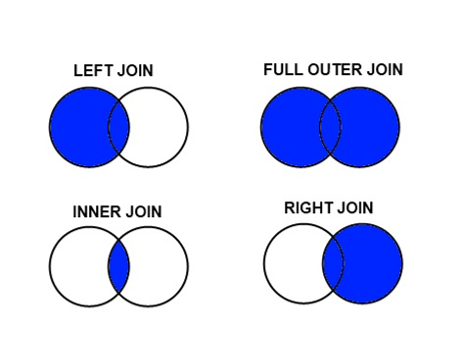

**jointure**

In [161]:
#définissons deux dataframe suivants
left_dataframe = pd.DataFrame({
   'id':[1,2,3,4],
   'Nom de station': ['PARIS', 'LEVALLOIS', 'VERSAILLES','MONTREUIL'],
   'variable':['var1','var2','var6','var5']})
left_dataframe

,id,Nom de station,variable
0,1,PARIS,var1
1,2,LEVALLOIS,var2
2,3,VERSAILLES,var6
3,4,MONTREUIL,var5


In [14]:
right_dataframe = pd.DataFrame(
   {'id':[1,2,3,4],
   'Nom de station': ['EVRY', 'MELIN', 'PONTOISE','MEAUX'],
   'variable':['var3','var1','var6','var5']})
right_dataframe

,id,Nom de station,variable
0,1,EVRY,var3
1,2,MELIN,var1
2,3,PONTOISE,var6
3,4,MEAUX,var5


In [153]:
# si l'on souhaite assembler deux dataframe sur une clé, on utilisera la méthode merge
data = pd.merge(left_dataframe,right_dataframe,on='id')
data

,id,Nom de station_x,variable_x,Nom de station_y,variable_y
0,1,PARIS,var1,EVRY,var3
1,2,LEVALLOIS,var2,MELIN,var1
2,3,VERSAILLES,var6,PONTOISE,var6
3,4,MONTREUIL,var5,MEAUX,var5


In [155]:
# si l'on souhaite assembler deux dataframe sur plusieurs clés
data = pd.merge(left_dataframe,right_dataframe,on=['id', 'variable'])
data

,id,Nom de station_x,variable,Nom de station_y
0,3,VERSAILLES,var6,PONTOISE
1,4,MONTREUIL,var5,MEAUX


In [157]:
#pour réaliser des jointures par la gauche ou par la droite on utilisera le paramètre how
#left join 
data=pd.merge(left_dataframe, right_dataframe, on='variable', how='left')
data

,id_x,Nom de station_x,variable,id_y,Nom de station_y
0,1,PARIS,var1,2.0,MELIN
1,2,LEVALLOIS,var2,NaN,NaN
2,3,VERSAILLES,var6,3.0,PONTOISE
3,4,MONTREUIL,var5,4.0,MEAUX


In [156]:
#right join 
data=pd.merge(left_dataframe, right_dataframe, on='variable', how='right')
data

,id_x,Nom de station_x,variable,id_y,Nom de station_y
0,NaN,NaN,var3,1,EVRY
1,1.0,PARIS,var1,2,MELIN
2,3.0,VERSAILLES,var6,3,PONTOISE
3,4.0,MONTREUIL,var5,4,MEAUX


In [158]:
#inner join 
data=pd.merge(left_dataframe, right_dataframe, on='variable', how='inner')
data

,id_x,Nom de station_x,variable,id_y,Nom de station_y
0,1,PARIS,var1,2,MELIN
1,3,VERSAILLES,var6,3,PONTOISE
2,4,MONTREUIL,var5,4,MEAUX


In [159]:
#outer join 
data=pd.merge(left_dataframe, right_dataframe, on='variable', how='outer')
data

,id_x,Nom de station_x,variable,id_y,Nom de station_y
0,1.0,PARIS,var1,2.0,MELIN
1,2.0,LEVALLOIS,var2,NaN,NaN
2,3.0,VERSAILLES,var6,3.0,PONTOISE
3,4.0,MONTREUIL,var5,4.0,MEAUX
4,NaN,NaN,var3,1.0,EVRY


**concaténation**

In [15]:
#on utilisera la méthode concat
data=pd.concat([left_dataframe,right_dataframe])
data

,id,Nom de station,variable
0,1,PARIS,var1
1,2,LEVALLOIS,var2
2,3,VERSAILLES,var6
3,4,MONTREUIL,var5
0,1,EVRY,var3
1,2,MELIN,var1
2,3,PONTOISE,var6
3,4,MEAUX,var5


In [16]:
#si l'on veut conserver un index propre à chaque dataframe
data=pd.concat([left_dataframe,right_dataframe], keys=['LEFT','RIGHT'])
data


id Nom de station variable
LEFT  0   1          PARIS     var1
      1   2      LEVALLOIS     var2
      2   3     VERSAILLES     var6
      3   4      MONTREUIL     var5
RIGHT 0   1           EVRY     var3
      1   2          MELIN     var1
      2   3       PONTOISE     var6
      3   4          MEAUX     var5

In [167]:
#si on prefère les concaténer par colonne plutôt que par ligne on jouera sur le paramètre axis
data=pd.concat([left_dataframe,right_dataframe], keys=['LEFT','RIGHT'], axis = 1)
data

LEFT                         RIGHT                        
    id Nom de station variable    id Nom de station variable
0    1          PARIS     var1     1           EVRY     var3
1    2      LEVALLOIS     var2     2          MELIN     var1
2    3     VERSAILLES     var6     3       PONTOISE     var6
3    4      MONTREUIL     var5     4          MEAUX     var5

> ## sauvegarder un dataframe <a class="anchor" id="sauvegarde"></a>

Pour finir et sauvegarder notre dataframe on utilise les fonctions to_csv ou to_table avec les options similaires que read_csv()  
``` 
    mon_dataframe.to_csv("./chemin", index = , header = , sep= ) 
````

# Import export de données <a class="anchor" id="import_export"></a>

Lorsque l'on souhaite manipuler des données par traitement informatique, les données sont généralement structurées selon des spécificités particulières pour faciliter le traitement et l'analyse. C'est ce qu'on appelle le formatage des données. Ce processus permet de garantir la cohérence et la qualité des données.
Il existe différents types de formats : le format csv, txt, json XML ect...
Nous allons voir ceux que vous rencontrerez le plus fréquement :

> ## Importation et exportation des fichiers CSV <a class="anchor" id="CSV"></a>

Le format CSV ou Comma separated value est un format texte simple qui utilise des virgules pour séparer les valeurs. Il a une structure tabulaire (lignes et colonnes). Il permet le partage de données entre applications (par exemple, entre Excel et des bases de données), l'exportation de données pour des analyses simples et a l'avantage de pouvoir importer de grandes quantités de données dans des systèmes.

Nous nous appuierons sur les fichiers de données de santé disponible sous différents formats à l'adresse suivante :
https://www.data.gouv.fr/fr/datasets/pathologies-effectif-de-patients-par-pathologie-sexe-classe-dage-et-territoire-departement-region/#/resources

In [ ]:
# importer votre fichier données santé au format csv :
csv_file = # mettez l'adresse où se trouve votre fichier 
df_csv = pd.read_csv(csv_file)

In [ ]:
#affichez les 5 premières lignes : 
print(df_csv.head())

In [ ]:
# Exporter un DataFrame en CSV
df_csv.to_csv("mesdonnees_csv_exportees.csv", index=False)

> ## Importation et exportation des fichiers JSON <a class="anchor" id="JSON"></a>

JSON (JavaScript Object Notation) est un format d'échange de données léger, souvent utilisé pour les API et les services web. Il permet de stocker des structures de données plus complexes (tableaux imbriqués, objets). Cependant, il peut être plus lourd qu'un CSV,et plus complexe à traiter qu'un CSV pour certaines opérations simples

In [ ]:
#import de la librairie json
import json

In [ ]:
# importer votre fichier données santé au format json  :
json_file = # mettez l'adresse où se trouve votre fichier 
df_json = pd.read_json(json_file)

In [ ]:
#affichez les 5 premières lignes : 
print(df_json.head())

In [ ]:
# Exporter le DataFrame en json
df_json.to_json("mesdonnees_json_exportees.json", orient="records") # A quoi sert le paramètre orient ? 

> ## Importation et exportation à partir d'une URL <a class="anchor" id="URL"></a>

Il est fréquent que les données soient disponibles en ligne via des fichiers distants ou des APIs. L'importation depuis une URL permet d'obtenir des données à jour sans avoir à les stocker localement. Cela permet d'avoir des données mises à jour en temps réel et ainsi d'automatiser les récupérations de données.  
La librairie urllib est une bibliothèque standard de Python pour travailler avec les URLs. Elle permet de télécharger des données directement depuis une URL et offre un contrôle plus fin sur le processus de récupération des données.

In [ ]:
#import des librairies
import urllib
from urllib.request import urlopen

In [ ]:
url = "https://raw.githubusercontent.com/vega/vega-datasets/master/data/movies.json"
response = urllib.request.urlopen(url)
data = json.loads(response.read())

In [ ]:
#import des données et affichage des premières lignes :
df_movies = pd.json_normalize(data)


> ## Importation et exportation à partir d'une base de données SQL<a class="anchor" id="SQL"></a>

La librairie `sqlite3` permet de manipuler une base de données SQLite directement, offrant plus de contrôle sur les opérations SQL.Elle permet  le contrôle total sur les requêtes SQL et il n'est pas necessaire d'utiliser la librairies pandas. Nous en reparlerons lorsque nous apprendrons le language SQL.  
Pour en savoir plus sur le fonctionnement de Sqlite3 : https://docs.python.org/fr/3.5/library/sqlite3.html